In [32]:
#pip install mysql-connector

In [33]:
import mysql.connector
from mysql.connector import Error
import pandas as pd

In [34]:
def create_server_connection(host_name,user_name,user_password):
    connection=None
    try:
        connection=mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password)
        print("MySQL CONNECTION SUCCESSFULL")
    except Error as err:
        print(f"Error:'{err}'")
    return connection
pw='Pooja123@'
db="project"
connection=create_server_connection("localhost","root",pw)
        

MySQL CONNECTION SUCCESSFULL


In [35]:
def create_db_connection(host_name,user_name,user_password,db_name):
    connection=None
    try:
        connection=mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password,
            database=db_name)
        print("Database connected")
    except Error as err:
        print(f"Error:'{err}'")
    return connection


In [36]:
import mysql.connector
 
# connecting to the database 
dataBase = mysql.connector.connect(
                     host = "localhost",
                     user = "root",
                     passwd = "Pooja123@",
                     database = "project" ) 
 
# preparing a cursor object 
cursorObject = dataBase.cursor()

In [37]:
# selecting query
query = "SELECT * FROM product"
cursorObject.execute(query)
 
myresult = cursorObject.fetchall()
 
for x in myresult:
    print(x)

(3518, 'Popcorn', 'SOLID', 10)
(3827, 'Croissant', 'SEMI-LIQUID', 1)
(3854, 'Croissant', 'SEMI-LIQUID', 9)
(4064, 'French fries', 'LIQUID', 6)
(4114, 'Croissant', 'SOLID', 9)
(4183, 'Hot dog', 'SEMI-LIQUID', 4)
(4202, 'Ice cream', 'SOLID', 3)
(4450, 'Waffles', 'SEMI-LIQUID', 8)
(4527, 'Hot dog', 'SEMI-LIQUID', 2)
(4530, 'Waffles', 'LIQUID', 1)
(4564, 'Waffles', 'SEMI-LIQUID', 10)
(4629, 'Popcorn', 'SEMI-LIQUID', 1)
(4849, 'Hot dog', 'SEMI-LIQUID', 6)
(5031, 'Croissant', 'SOLID', 10)
(5437, 'Waffles', 'LIQUID', 7)
(5458, 'Ice cream', 'LIQUID', 10)
(5937, 'Sausages', 'SEMI-LIQUID', 5)
(6362, 'Popcorn', 'SOLID', 10)
(6395, 'Noodles', 'SOLID', 8)
(6522, 'Toast', 'SEMI-LIQUID', 3)
(6575, 'Sausages', 'LIQUID', 8)
(6817, 'Waffles', 'SEMI-LIQUID', 9)
(6826, 'Noodles', 'SOLID', 8)
(6983, 'Ice cream', 'SOLID', 6)
(7202, 'Noodles', 'SEMI-LIQUID', 4)
(7354, 'Sausages', 'SEMI-LIQUID', 2)
(7525, 'Hot dog', 'SOLID', 6)
(7547, 'Toast', 'SEMI-LIQUID', 2)
(8149, 'Hot dog', 'LIQUID', 4)
(8229, 'Croissant

In [38]:
#pip install sqlalchemy

PROD NUMBER=  [3518, 3827, 3854, 4064, 4114, 4183, 4202, 4450, 4527, 4530, 4564, 4629, 4849, 5031, 5437, 5458, 5937, 6362, 6395, 6522, 6575, 6817, 6826, 6983, 7202, 7354, 7525, 7547, 8149, 8229]
QUANTITY OF PRODUCTS PURCHASED=  [10, 1, 9, 6, 9, 4, 3, 8, 2, 1, 10, 1, 6, 10, 7, 10, 5, 10, 8, 3, 8, 9, 8, 6, 4, 2, 6, 2, 4, 2]


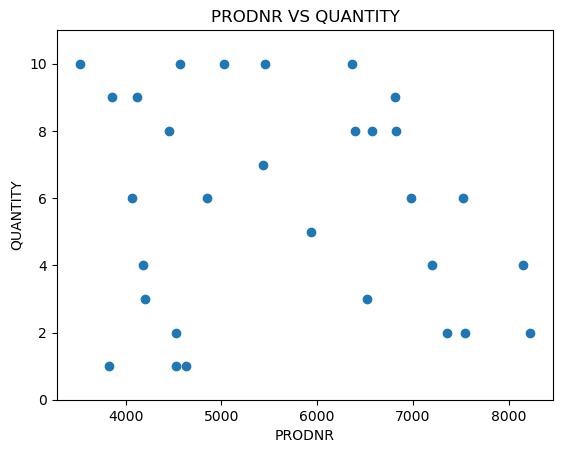

In [39]:
import matplotlib.pyplot as plt
import mysql.connector 
PRODNR = []
QUANTITY = []
query = "SELECT * FROM product"
cursorObject.execute(query)
 
myresult = cursorObject.fetchall()
 

 
for i in myresult:
    PRODNR.append(i[0])
    QUANTITY.append(i[3])
 
print("PROD NUMBER= ", PRODNR)
print("QUANTITY OF PRODUCTS PURCHASED= ",QUANTITY)

plt.scatter(PRODNR, QUANTITY)
plt.ylim(0,11)

plt.xlabel("PRODNR")
plt.ylabel("QUANTITY")
plt.title("PRODNR VS QUANTITY")
plt.show()

PROD NAME=  ['Popcorn', 'Croissant', 'French fries', 'Hot dog', 'Ice cream']
TOTAL QUANTITY OF PRODUCTS PURCHASED=  [Decimal('22'), Decimal('29'), Decimal('12'), Decimal('32'), Decimal('16')]


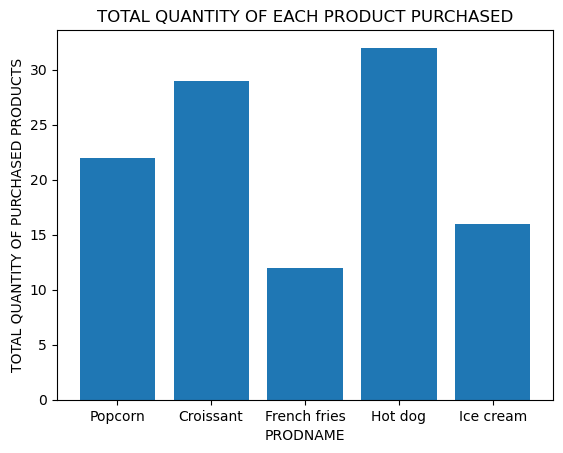

In [40]:
PRODNAME = []
TOTALQUANTITY = []
query = """SELECT DISTINCT P.PRODNAME,SUM(P.PRODQUANTITY) AS TOTALQUANTITY 
FROM PRODUCT P,SUPPLIER S WHERE P.PRODNR=S.PRODNR 
GROUP BY P.PRODNAME LIMIT 5 """
cursorObject.execute(query)
 
myresult = cursorObject.fetchall()
for i in myresult:
    PRODNAME.append(i[0])
    TOTALQUANTITY.append(i[1])
 
print("PROD NAME= ", PRODNAME)
print("TOTAL QUANTITY OF PRODUCTS PURCHASED= ",TOTALQUANTITY)

plt.bar(PRODNAME, TOTALQUANTITY)

plt.xlabel("PRODNAME")
plt.ylabel("TOTAL QUANTITY OF PURCHASED PRODUCTS")
plt.title("TOTAL QUANTITY OF EACH PRODUCT PURCHASED")
plt.show()

recipename=  ['Waffles', 'Ice cream', 'Toast', 'Sausages']
TOTAL RATINGS FOR EACH RECIPE=  [Decimal('6673'), Decimal('7679'), Decimal('2660'), Decimal('433')]


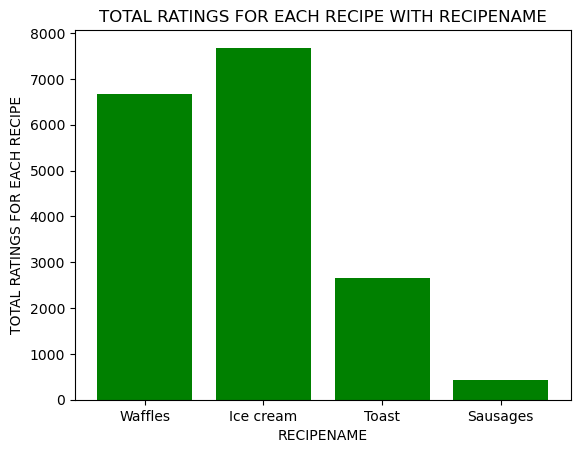

In [41]:
RECIPENAME = []
TOTAL_RATINGS = []

myquery = """
    WITH HUNGRYFOODS AS (
        SELECT R.FOODNAME AS RECIPENAME, RA.RATINGID AS RATING, F.FEEDBACKTEXT AS FEEDBACK
        FROM RECIPE R, RATINGS RA, FEEDBACK F
        WHERE RA.RECIPEID = R.RECIPEID AND R.RECIPEID = F.RECIPEID
    )
    SELECT RECIPENAME, SUM(RATING) AS TOTAL_RATINGS
    FROM HUNGRYFOODS
    GROUP BY RECIPENAME
"""

cursorObject.execute(myquery)

result = cursorObject.fetchall()

for j in result:
    RECIPENAME.append(j[0])
    TOTAL_RATINGS.append(j[1])

print("recipename= ", RECIPENAME)
print("TOTAL RATINGS FOR EACH RECIPE= ", TOTAL_RATINGS)

plt.bar(RECIPENAME, TOTAL_RATINGS, color='green')
plt.xlabel("RECIPENAME")
plt.ylabel("TOTAL RATINGS FOR EACH RECIPE")
plt.title("TOTAL RATINGS FOR EACH RECIPE WITH RECIPENAME")
plt.show()


PROFILENAME=  ['Gasparo', 'Bern', 'Dukie', 'Granville', 'Carver', 'Nicky', 'Olivie']
FOLLOWERS=  [345, 65, 484, 464, 124, 350, 165]


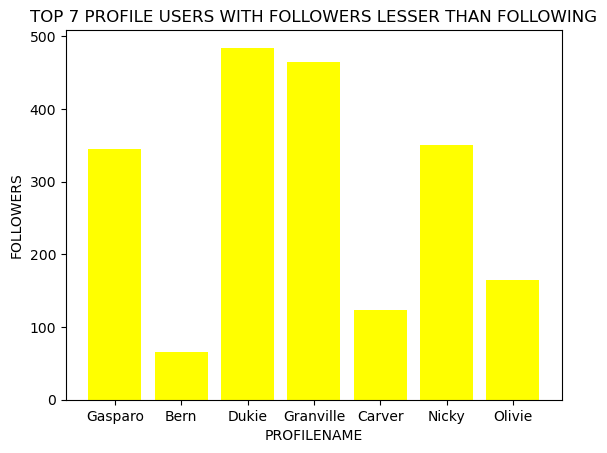

In [42]:
profilename =[]
followers =[]
query= """select p1.profileid,p1.profilename,p2.followers,p2.following
from profile p1,profile p2
where p1.profileid=p2.profileid
and (p1.followers<p2.following)
limit 7"""

cursorObject.execute(query)

result = cursorObject.fetchall()

for j in result:
    profilename.append(j[1])
    followers.append(j[2])

print("PROFILENAME= ", profilename)
print("FOLLOWERS= ", followers)

plt.bar(profilename, followers, color='yellow')
plt.xlabel("PROFILENAME")
plt.ylabel("FOLLOWERS")
plt.title("TOP 7 PROFILE USERS WITH FOLLOWERS LESSER THAN FOLLOWING")
plt.show()



recipeid=  [267, 612, 617, 125, 737]
Foodname=  ['Sausages', 'Noodles', 'Croissant', 'Ice cream', 'French fries']


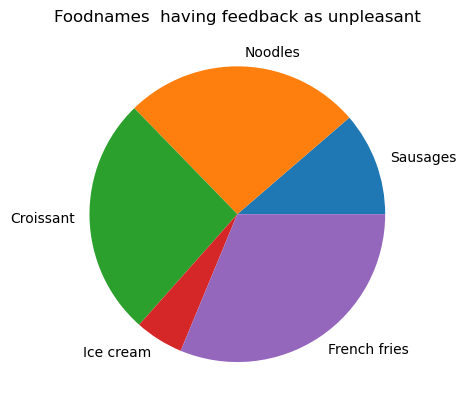

In [43]:
foodname=[]
recipeid=[]
query="""select r.foodname,f.feedbacktext,r.recipeid
from recipe r, feedback f
where r.recipeid=f.recipeid
and f.feedbacktext='unpleasant'"""

cursorObject.execute(query)

result = cursorObject.fetchall()

for j in result:
    recipeid.append(j[2])
    foodname.append(j[0])

print("recipeid= ", recipeid)
print("Foodname= ", foodname)

plt.pie(recipeid, labels = foodname)
plt.title("Foodnames  having feedback as unpleasant")

plt.show()
